In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [66]:
dir = 'DataSet/Pokemon'
save_dir = "DataSet/Pokemon_Data_Aug"
# Gain the name of all the folders in the directory
pokemon_name = os.listdir(dir)

DataSet/Pokemon/Aipom/120px-0190Aipom.png


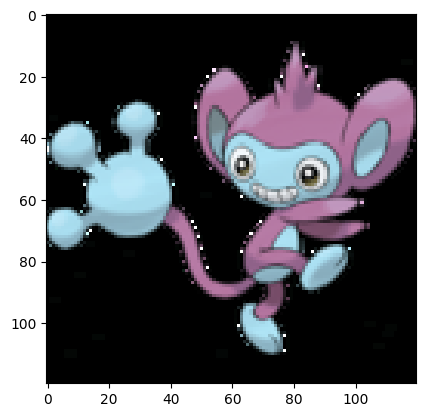

In [70]:
# Read first img from "DataSet/Pokemon/Aipom"
img = cv2.imread(dir + '/' + pokemon_name[0] + '/' + os.listdir(dir + '/' + pokemon_name[0])[0])
print(dir + '/' + pokemon_name[0] + '/' + os.listdir(dir + '/' + pokemon_name[0])[0])
# show the image
plt.imshow(img)

In [80]:
def augment_data_rotation(image_path, save_dir):
    # Load the image
    image = cv2.imread(image_path)
    
    # Perform 90 degree rotations and save 3 extra images
    for i in range(3):
        # Rotate the image by 90 degrees
        rotated_image = np.rot90(image, i+1)
        save_path = save_dir + "/" + os.path.basename(image_path)[:-4] + "_rotated_" + str(i+1) + ".jpg"
        cv2.imwrite(save_path, rotated_image)

In [79]:
def augment_data_gaussian_noise(image_path, save_dir, mean=0, sigma=30):
    # Load the image
    image = cv2.imread(image_path)
    
    # Add Gaussian noise and save 3 extra images
    for i in range(3):
        # Generate random Gaussian noise and add it to the image
        noise = np.random.normal(mean, sigma, size=image.shape)
        noisy_image = image + noise.astype(np.uint8)
        
        # Save the augmented image
        save_path = os.path.join(save_dir, os.path.basename(image_path)[:-4] + "_gaussian_noise_" + str(i+1) + ".jpg")
        cv2.imwrite(save_path, noisy_image)

In [78]:
def augment_data_flipping(image_path, save_dir):
    # Load the image
    image = cv2.imread(image_path)
    
    # Flip the image horizontally and vertically and save 2 extra images
    flipped_h = cv2.flip(image, 0)
    flipped_v = cv2.flip(image, 1)
    
    save_path_h = os.path.join(save_dir, os.path.basename(image_path)[:-4] + "_flipped_hv.jpg")
    save_path_v = os.path.join(save_dir, os.path.basename(image_path)[:-4] + "_flipped_vh.jpg")
    
    cv2.imwrite(save_path_h, flipped_h)
    cv2.imwrite(save_path_v, flipped_v)

In [76]:
augment_data_flipping(dir + '/' + pokemon_name[0] + '/' + os.listdir(dir + '/' + pokemon_name[0])[0], save_dir)

In [81]:
for pokemon in pokemon_name:
    #print("Now processing: ", pokemon)
    read_path = os.path.join(dir, pokemon)
    save_path = os.path.join(save_dir, pokemon)
    # print("Read path: ", read_path)
    # print("Save path: ", save_path)
    print("There are {} images in {}.".format(len(os.listdir(read_path)), pokemon))
    for image in os.listdir(read_path):
        print("Now processing: the {}th image in {}.".format(os.listdir(read_path).index(image), pokemon))
        print("The image name is: ", image)
        # Save the original image
        imgpath = read_path + '/' + image
        img = plt.imread(imgpath)
        plt.imsave(save_path + '/' + image, img)
        # Perform data augmentation
        augment_data_rotation(imgpath, save_path)
        augment_data_gaussian_noise(imgpath, save_path)

There are 25 images in Aipom.
Now processing: the 0th image in Aipom.
The image name is:  120px-0190Aipom.png
Now processing: the 1th image in Aipom.
The image name is:  120px-190Aipom_Channel.png
Now processing: the 2th image in Aipom.
The image name is:  120px-190Aipom_Dream_2.png
Now processing: the 3th image in Aipom.
The image name is:  120px-190Aipom_GS.png
Now processing: the 4th image in Aipom.
The image name is:  120px-190Aipom_OS_anime.png
Now processing: the 5th image in Aipom.
The image name is:  Ani190OD.png
Now processing: the 6th image in Aipom.
The image name is:  Spr_2g_190.png
Now processing: the 7th image in Aipom.
The image name is:  Spr_2g_190_jp.png
Now processing: the 8th image in Aipom.
The image name is:  Spr_2g_190_s_jp.png
Now processing: the 9th image in Aipom.
The image name is:  Spr_2s_190.png
Now processing: the 10th image in Aipom.
The image name is:  Spr_2s_190_jp.png
Now processing: the 11th image in Aipom.
The image name is:  Spr_2s_190_s.png
Now proc